In [1]:
%pylab ipympl
import os,sys
from multiprocessing import Pool
from tqdm import tqdm

sys.path.insert(0,'/home/user/user/niagara_scratch_sblouin/PyPPM')
from ppmpy import ppm

import collections
hydro = collections.namedtuple('hydro', ['moms','rprof'])

# turn off matplotlib messages
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# the list of variables that are stored within the momsdata cube.
var_list = ['xc','ux','uy','uz','|ut|','|ur|','|w|','T','rho','fv']

In [3]:
data_dir = ['/home/user/user/niagara_scratch_fherwig/',
            '/home/user/user/niagara_scratch_sblouin/']
runs = ['X24','X25']
heating = [1,1]
run_dir = ['X24-1xL-1xK-heating-768-mc12400-rin40-P0fix-kappamod',
           'X25']

In [4]:
rprof = {}
rprofbq = {}
for i,run in enumerate(runs):
    rprof_dir = os.path.join(data_dir[i],run_dir[i],'prfs')
    rprof[run] = ppm.RprofSet(rprof_dir)
    rprofbq[run] = ppm.RprofSet(rprof_dir, bqav=True, var_list=var_list)

1291 rprof files found in '/home/user/user/niagara_scratch_fherwig/X24-1xL-1xK-heating-768-mc12400-rin40-P0fix-kappamod/prfs/.
Dump numbers range from 0 to 1290.
881 rprof files found in '/home/user/user/niagara_scratch_fherwig/X24-1xL-1xK-heating-768-mc12400-rin40-P0fix-kappamod/prfs/frombqavs/.
Dump numbers range from 400 to 1280.
511 rprof files found in '/home/user/user/niagara_scratch_sblouin/X25/prfs/.
Dump numbers range from 0 to 510.
211 rprof files found in '/home/user/user/niagara_scratch_sblouin/X25/prfs/frombqavs/.
Dump numbers range from 300 to 510.


In [5]:
matplotlib.rcParams.update({'font.size': 12})

Text(0, 0.5, '$|U|$ (km$\\,$s$^{-1}$), $100 \\times | \\nabla \\times U |$ (s$^{-1}$)')

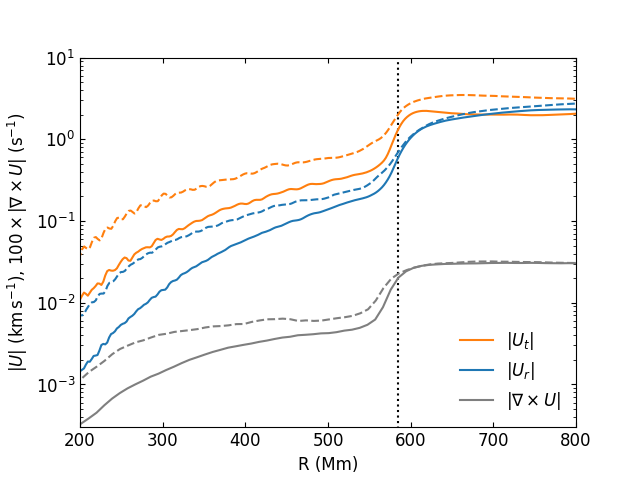

In [6]:
close(1);figure(1)
dump = 400

semilogy(rprof['X24'].get('R',dump), 1e3*rprof['X24'].get('|Ut|',dump),label=r'$|U_t|$',color='tab:orange')
semilogy(rprof['X24'].get('R',dump), 1e3*rprof['X24'].get('|Ur|',dump),label=r'$|U_r|$',color='tab:blue')
cb = rprof['X24'].bound_rad(dump,200,800,var='ut',criterion='max_grad')
vlines(cb, 1e-8,10,ls=':',color='k')

semilogy(rprof['X25'].get('R',dump), 1e3*rprof['X25'].get('|Ut|',dump),color='tab:orange',ls='--')
semilogy(rprof['X25'].get('R',dump), 1e3*rprof['X25'].get('|Ur|',dump),color='tab:blue',ls='--')
cb = rprof['X25'].bound_rad(dump,200,800,var='ut',criterion='max_grad')
#vlines(cb, 1e-6,1e-3,ls='--',color='k')
legend()
ylim(3e-4,10)

ax = plt.gca()
ax.semilogy(rprofbq['X24'].get('xcmax',dump), 100*rprofbq['X24'].get('|w|',dump), markevery=20, label=r'$|\nabla \times U|$',color='tab:gray')
ax.semilogy(rprofbq['X25'].get('xcmax',dump), 100*rprofbq['X25'].get('|w|',dump), markevery=20, color='tab:gray', ls='--')
legend()
#ylim(1e-8,.5e-3)

xlabel('R (Mm)')
ylabel(r'$| \nabla \times U |$ (s$^{-1}$)')
ax = plt.gca()
ax.tick_params(axis='both',direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
legend(frameon=False, loc=4)
xlim(200,800)
ylabel(r'$|U|$ (km$\,$s$^{-1}$), $100 \times | \nabla \times U |$ (s$^{-1}$)')